In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import numpy as np
import matplotlib.pyplot as plt

from qiskit import BasicAer, QuantumCircuit,execute
from qiskit.algorithms import Grover
from qiskit.utils import QuantumInstance
from qiskit.algorithms import AmplificationProblem

backend = BasicAer.get_backend("qasm_simulator")
quantum_instance = QuantumInstance(backend, shots=1024)

from qiskit.visualization import plot_histogram

$|w\rangle =|11\rangle$
#### 2 Z gates and a CZ gate

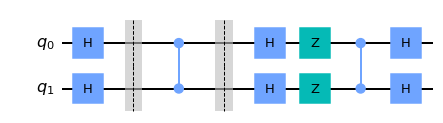

In [2]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.barrier()
qc.cz(0,1)
qc.barrier()
qc.h([0,1])
qc.z([0,1])
qc.cz(0,1)
qc.h([0,1])
qc.draw(output="mpl")

In [3]:
qc.measure_all()
result = execute(qc, backend=backend,shots=1024).result()
result.get_counts()

{'11': 1024}

#### X layer + H gate + MCX + H gate + X layer

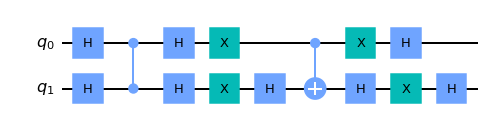

In [4]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cz(0,1)
qc.h([0,1])
qc.x([0,1])
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x([0,1])
qc.h([0,1])
qc.draw(output="mpl")

In [5]:
qc.measure_all()
result = execute(qc, backend=backend,shots=1024).result()
result.get_counts()

{'11': 1024}

#### Qiskit built-in Grover's algorithm

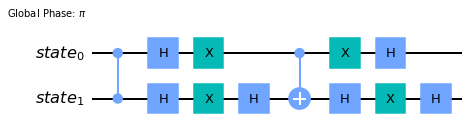

In [6]:
object_state = ['11']

qc = QuantumCircuit(2)
qc.cz(0,1)

problem = AmplificationProblem(qc, is_good_state=object_state)
problem.grover_operator.decompose().draw(output='mpl')

In [7]:
grover = Grover(quantum_instance=quantum_instance)
result = grover.amplify(problem)
result.circuit_results[0]

{'11': 1024}

#### Amplitude amplification
Grover starts with uniform superposition of all the states, amplitude amplification starts with specific states.


Bad state
Top measurement: 00


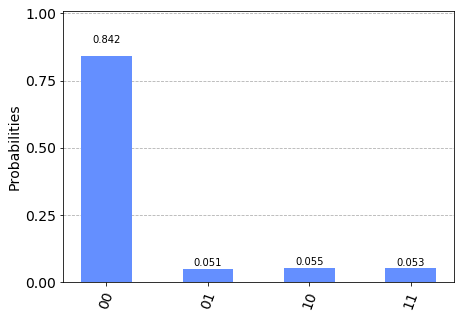

In [8]:
object_state = ['11']

qc = QuantumCircuit(2)
qc.cz(0,1)

prep = QuantumCircuit(2)
prep.rx((1/6)*np.pi,0)
prep.ry((1/6)*np.pi,1)

problem = AmplificationProblem(qc, state_preparation=prep, is_good_state=object_state)
grover = Grover(quantum_instance=quantum_instance)
result = grover.amplify(problem)

print('Good state' if result.oracle_evaluation else 'Bad state')
print('Top measurement:', result.top_measurement)
plot_histogram(result.circuit_results[0])


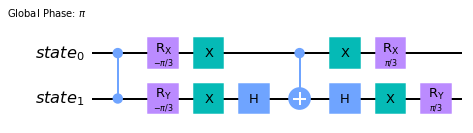

In [9]:
object_state = ['11']

qc = QuantumCircuit(2)
qc.cz(0,1)

prep = QuantumCircuit(2)
prep.rx((1/3)*np.pi,0)
prep.ry((1/3)*np.pi,1)

problem = AmplificationProblem(qc, state_preparation=prep, is_good_state=object_state)
problem.grover_operator.decompose().draw(output='mpl')

Good state
Top measurement: 11


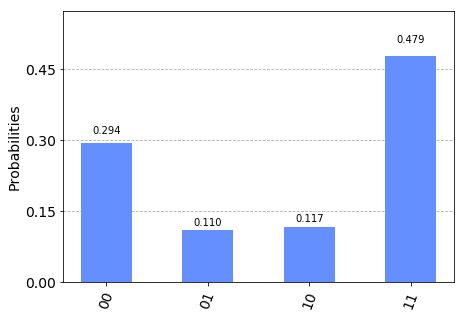

In [10]:
grover = Grover(quantum_instance=quantum_instance)
result = grover.amplify(problem)

print('Good state' if result.oracle_evaluation else 'Bad state')
print('Top measurement:', result.top_measurement)
plot_histogram(result.circuit_results[0])

#### Generate circuit manually

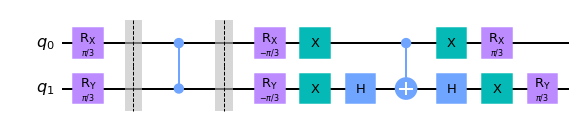

In [11]:
qc = QuantumCircuit(2)
qc.rx((1/3)*np.pi,0)
qc.ry((1/3)*np.pi,1)

qc.barrier()
qc.cz(0,1)
qc.barrier()
qc.rx((-1/3)*np.pi,0)
qc.ry((-1/3)*np.pi,1)
qc.x([0,1])
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x([0,1])
qc.rx((1/3)*np.pi,0)
qc.ry((1/3)*np.pi,1)
qc.draw(output="mpl")

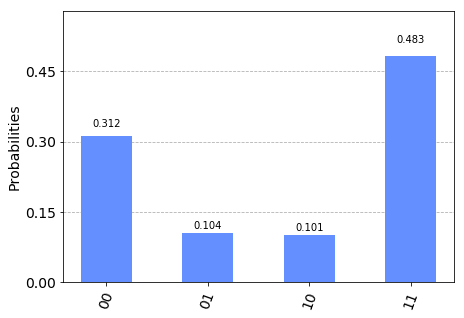

In [12]:
qc.measure_all()
result = execute(qc, backend=backend,shots=1024).result()
plot_histogram(result.get_counts())